In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/workspaces/Intermediate-Data-Science-Projects/Retail-Demand-Forecasting/dataset/E-commerce Shopping Dataset.csv")

In [5]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [6]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (3000, 17)
Columns: Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_date',
       'product_category', 'product_price', 'quantity', 'payment_method',
       'delivery_status', 'city', 'state', 'zipcode', 'product_id',
       'discount_applied', 'order_value', 'review_rating', 'return_requested'],
      dtype='object')


In [7]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Unnamed: 0            0
order_id              0
customer_id           0
order_date            0
product_category      0
product_price         0
quantity              0
payment_method        0
delivery_status       0
city                  0
state                 0
zipcode               0
product_id            0
discount_applied      0
order_value           0
review_rating       130
return_requested      0
dtype: int64


In [8]:
print("\nData types:")
print(df.dtypes)


Data types:
Unnamed: 0                   int64
order_id                    object
customer_id                 object
order_date          datetime64[ns]
product_category            object
product_price              float64
quantity                     int64
payment_method              object
delivery_status             object
city                        object
state                       object
zipcode                      int64
product_id                  object
discount_applied           float64
order_value                float64
review_rating              float64
return_requested              bool
dtype: object


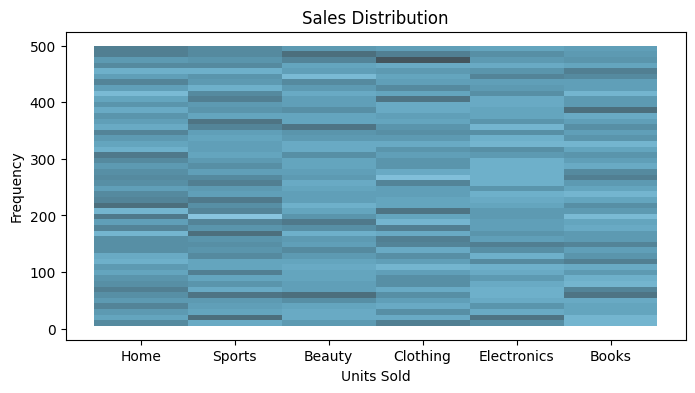

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(y=df['product_price'],x=df['product_category'] ,bins=50, kde=True, color='skyblue')
plt.title("Sales Distribution")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()

In [12]:
sales_by_date = df.groupby('order_date')['product_price'].sum().reset_index()

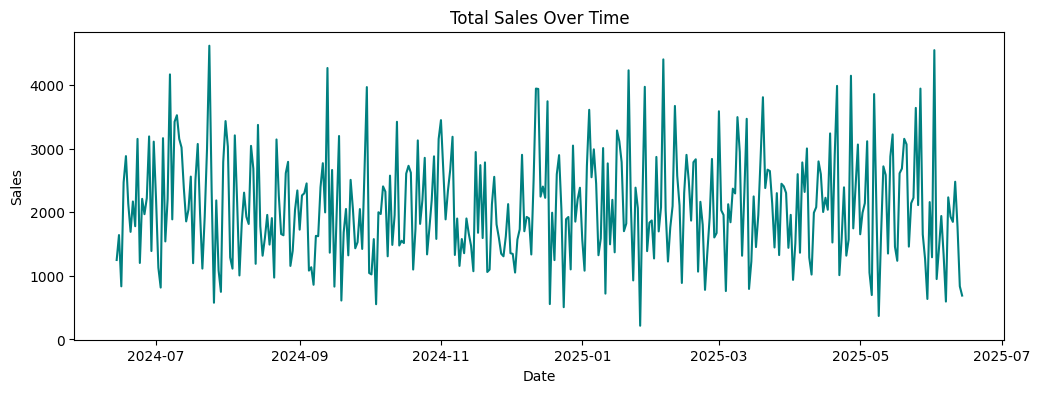

In [14]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=sales_by_date, x='order_date', y='product_price', color='teal')
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [20]:
sales_by_store = df.groupby('product_category')['product_price'].sum().reset_index()